# **SPEECH EMOTION RECOGNITION**

---

## We gather data from 4 major Datasets

* Crema (Crowd-sourced Emotional Multimodal Actors)
* Ravdess (Ryerson Audio-Visual Database of Emotional Speech and Song)
* Savee (Surrey Audio-Visual Expressed Emotion)
* Tess (Toronto Emotional Speech Set)

Dataset link: https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en

---

## We detect 7 different Emotions

* Angry
* Disgust
* Fear
* Happy
* Neutral
* Sad
* Surprised

---

**Importing Libraries**

---

In [ ]:
!pip install librosa

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

---

In [2]:
!unzip '/content/drive/MyDrive/Capstone 2.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Capstone 2/og data/Crema/1089_IEO_ANG_MD.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_DIS_HI.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_DIS_LO.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_DIS_MD.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_FEA_HI.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_FEA_LO.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_FEA_MD.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_HAP_HI.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_HAP_LO.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_HAP_MD.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_NEU_XX.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_SAD_HI.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_SAD_LO.wav  
  inflating: Capstone 2/og data/Crema/1089_IEO_SAD_MD.wav  
  inflating: Capstone 2/og data/Crema/1089_IOM_ANG_XX.wav  
  inflating: Capstone 2/og data/Crema/1089_IOM_DI

**Removing Unecessary Files**

---

In [3]:
import os

file_path = ['/content/Capstone 2/Data/Angry/desktop.ini',
             '/content/Capstone 2/Data/Disgust/desktop.ini',
             '/content/Capstone 2/Data/Fear/desktop.ini',
             '/content/Capstone 2/Data/Happy/desktop.ini',
             '/content/Capstone 2/Data/Neutral/desktop.ini',
             '/content/Capstone 2/Data/Sad/desktop.ini',
             '/content/Capstone 2/Data/Surprised/desktop.ini']
for i in file_path:
  if os.path.exists(i):
    os.remove(i)
    print(f"File {i} has been removed.")
  else:
      print(f"File {i} does not exist.")

File /content/Capstone 2/Data/Angry/desktop.ini has been removed.
File /content/Capstone 2/Data/Disgust/desktop.ini has been removed.
File /content/Capstone 2/Data/Fear/desktop.ini has been removed.
File /content/Capstone 2/Data/Happy/desktop.ini has been removed.
File /content/Capstone 2/Data/Neutral/desktop.ini has been removed.
File /content/Capstone 2/Data/Sad/desktop.ini has been removed.
File /content/Capstone 2/Data/Surprised/desktop.ini does not exist.


**Sorting the files into file paths and labels**

---

In [ ]:
def create_label_dataframe(label_name, directory):
    paths = []
    labels = []

    for root, dirs, files in os.walk(directory):
        for filepath in files:
            fpath = os.path.join(root, filepath)
            paths.append(fpath)
            labels.append(label_name)

    df = pd.DataFrame()
    df['paths'] = paths
    df['labels'] = labels

    return df

# Create a list to store DataFrames for each label
label_dataframes = []

labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
base_directory = '/content/Capstone 2/Data'

for label in labels:
    label_directory = os.path.join(base_directory, label)
    label_df = create_label_dataframe(label, label_directory)
    label_dataframes.append(label_df)

# Concatenate all label DataFrames into one DataFrame
data2 = pd.concat(label_dataframes, ignore_index=True)

# You now have a single DataFrame containing all data


In [ ]:
data.head()

paths labels
0  /content/Capstone 2/Data/Angry/1032_IEO_ANG_LO...  Angry
1  /content/Capstone 2/Data/Angry/1089_WSI_ANG_XX...  Angry
2  /content/Capstone 2/Data/Angry/1081_IEO_ANG_MD...  Angry
3  /content/Capstone 2/Data/Angry/1037_DFA_ANG_XX...  Angry
4  /content/Capstone 2/Data/Angry/1056_WSI_ANG_XX...  Angry

In [ ]:
data.shape

(12162, 2)

In [ ]:
data['labels'].value_counts()

Happy        1924
Angry        1923
Disgust      1923
Fear         1923
Sad          1922
Neutral      1895
Surprised     652
Name: labels, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

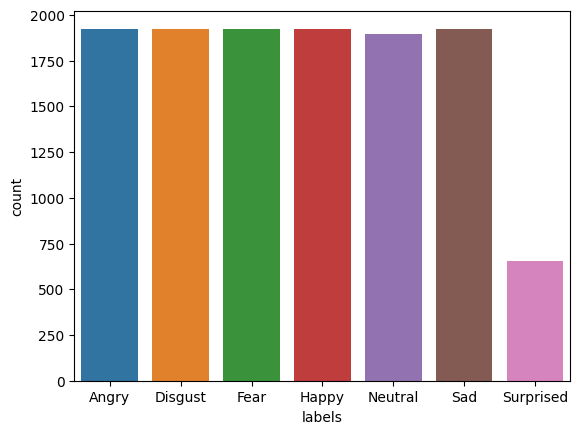

In [ ]:
sns.countplot(x=data['labels'])

**Visualising the data**

---

In [ ]:
#Code for looking at the waveplot
def waveplot(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path)

    # Create a time array for the x-axis
    time = librosa.times_like(y)

    # Create a waveform plot
    plt.figure(figsize=(10, 4))
    plt.plot(time, y, color='b')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Waveform')
    plt.show()

#Code to visualize the spectogram
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')

* Waveplot and Spectogram for **Angry**

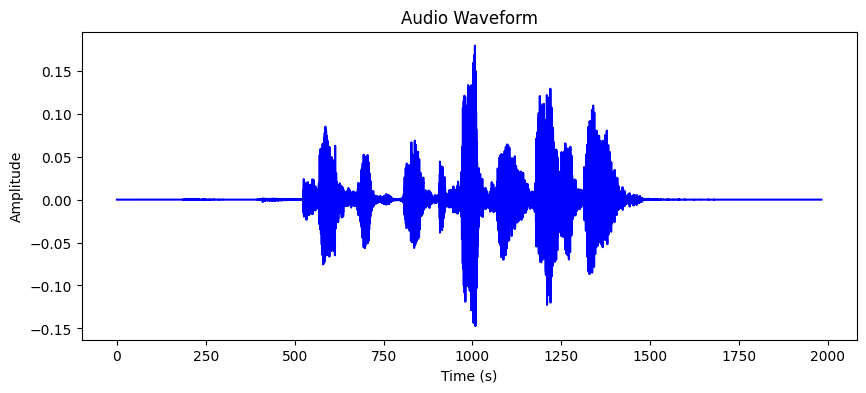

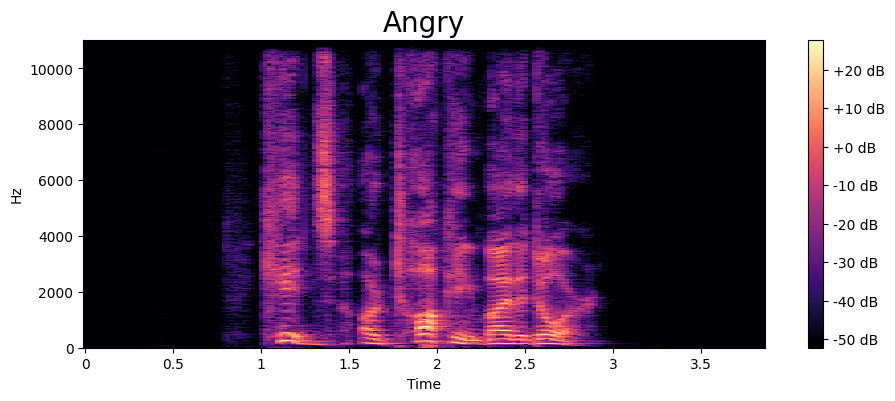

In [ ]:
path = '/content/Capstone 2/Data/Angry/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Angry')
Audio(path)

* Waveplot and Spectogram for **Disgust**

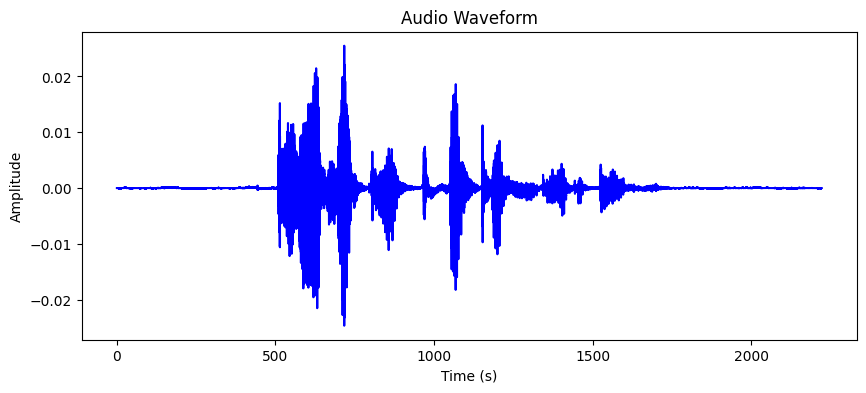

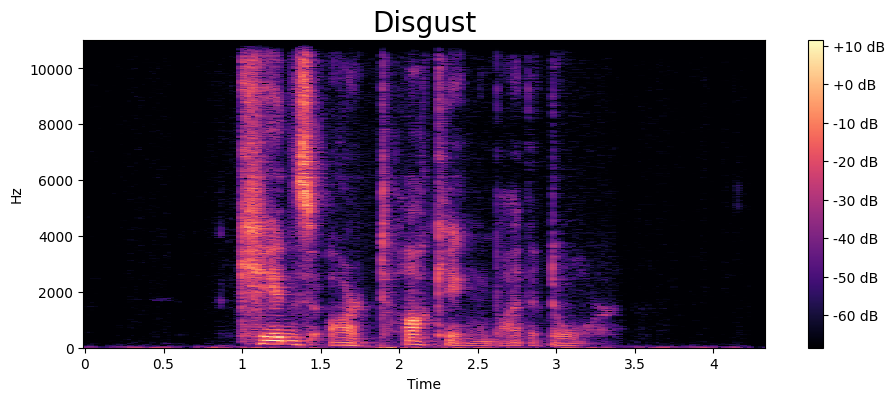

In [ ]:
path = '/content/Capstone 2/Data/Disgust/03-01-07-01-01-01-05.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Disgust')
Audio(path)

* Waveplot and Spectogram for **Fear**

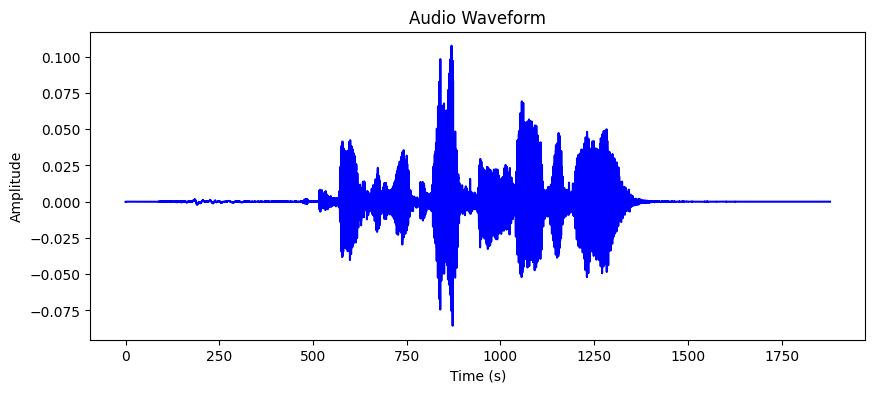

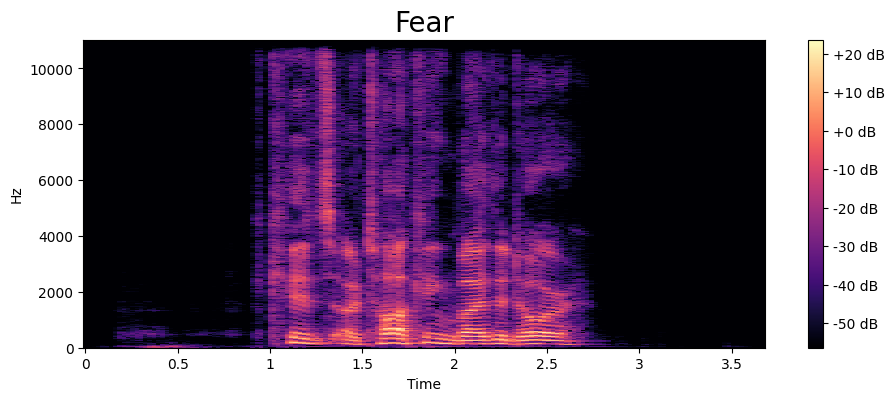

In [ ]:
path = '/content/Capstone 2/Data/Fear/03-01-06-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Fear')
Audio(path)

* Waveplot and Spectogram for **Happy**

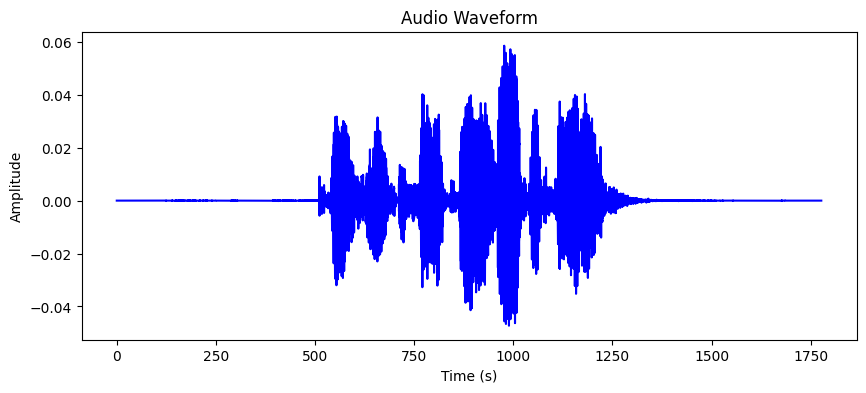

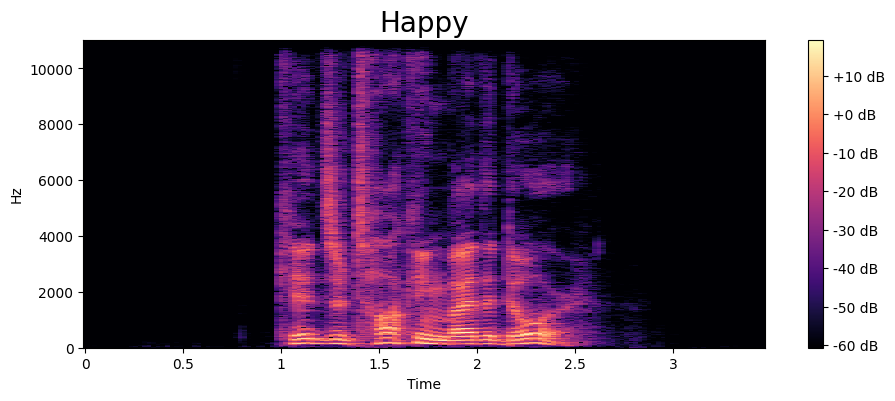

In [ ]:
path = '/content/Capstone 2/Data/Happy/03-01-03-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Happy')
Audio(path)

* Waveplot and Spectogram for **Neutral**

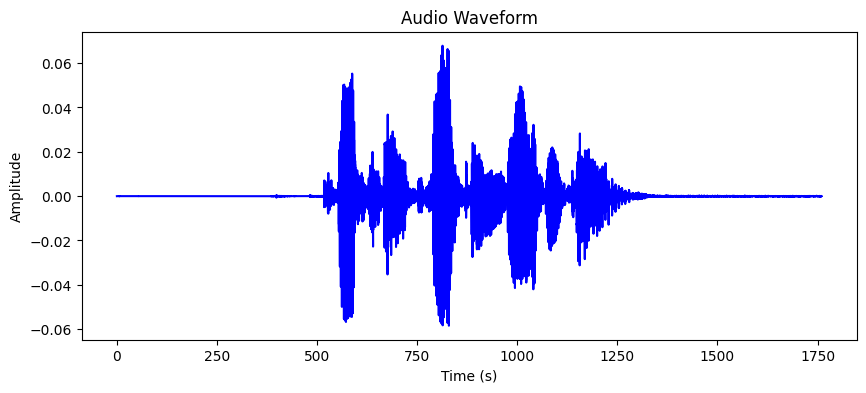

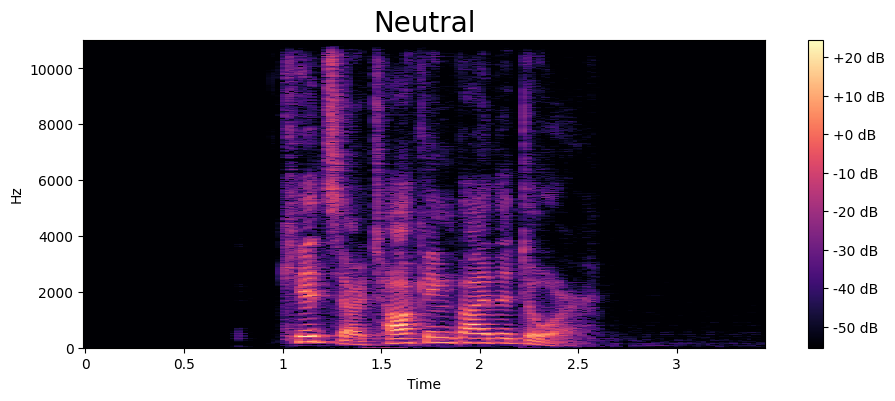

In [ ]:
path = '/content/Capstone 2/Data/Neutral/03-01-01-01-01-01-03.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Neutral')
Audio(path)

* Waveplot and Spectogram for **Sad**

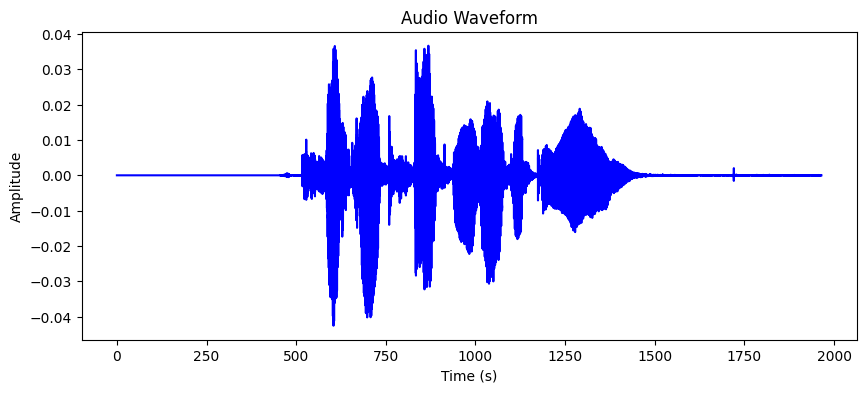

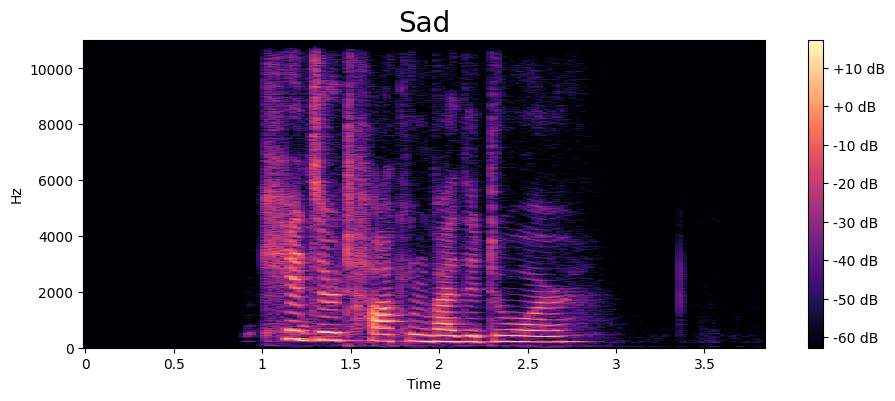

In [ ]:
path = '/content/Capstone 2/Data/Sad/03-01-04-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Sad')
Audio(path)

* Waveplot and Spectogram for **Surprised**

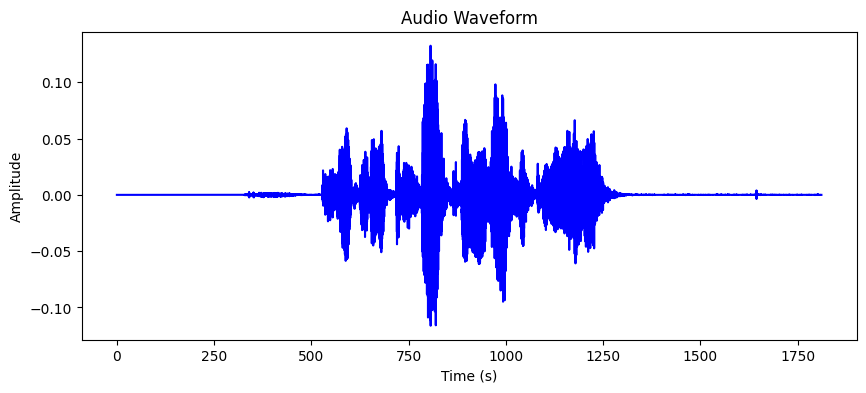

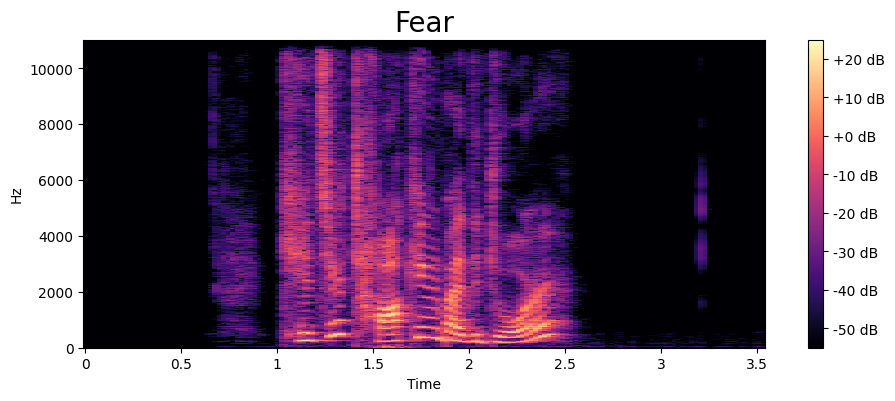

In [ ]:
path = '/content/Capstone 2/Data/Surprised/03-01-08-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
waveplot(path)
spectogram(data, sampling_rate, 'Fear')
Audio(path)

**Feature Extraction**

---

In [4]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=60).T, axis=0)
    return mfcc

**Applying Feaure Extraction**

---

In [ ]:
x = data2['paths'].apply(lambda x: extract_mfcc(x))

In [ ]:
x

0        [-287.03732, 129.61015, 9.607376, 26.902523, -...
1        [-231.46657, 75.31091, -21.464455, 38.420166, ...
2        [-343.2415, 118.26945, 7.298577, 34.67476, -17...
3        [-326.90222, 123.055435, -0.23093681, 46.83661...
4        [-242.48978, 111.04384, -24.815582, 45.390205,...
                               ...                        
12157    [-237.88043, 95.220985, 0.9635511, 28.659952, ...
12158    [-197.90538, 113.72018, -4.9860163, 29.73043, ...
12159    [-334.3724, 60.880363, -14.755251, -2.3327641,...
12160    [-342.9861, 94.82616, -24.713985, -26.03091, -...
12161    [-426.46286, 106.69511, 4.007008, -20.765448, ...
Name: paths, Length: 12162, dtype: object

In [ ]:
x = [i for i in x]
x = np.array(x)
x.shape

(12162, 60)

In [ ]:
x = np.expand_dims(x, -1)
x.shape

(12162, 60, 1)

**OneHotEncoding Target variables**

---

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data2[['labels']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(12162, 7)

**Building the Deep Learning Model**

---

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input,
from keras.layers import Dense , Embedding
from keras import layers, models

model = Sequential()

model.add(layers.Conv1D(256, 5, input_shape=(60, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 256)           1536      
                                                                 
 batch_normalization (Batch  (None, 56, 256)           1024      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 54, 128)           98432     
                                                                 
 max_pooling1d (MaxPooling1  (None, 27, 128)           0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 27, 128)           512       
 chNormalization)                                                
                                                        

**Model Checkpoint**

---

In [ ]:
model_checkpoint = ModelCheckpoint('best_model.h5',
                                   save_best_only=True,
                                   save_weights_only=False,
                                   monitor='val_accuracy',
                                   mode='max',
                                   verbose=1)

**Fitting Model**

---

In [ ]:
history = model.fit(x, y, validation_split=0.1, epochs=200, batch_size=64, callbacks=[model_checkpoint])

Epoch 1/200
172/172 [==============================] - ETA: 0s - loss: 1.4382 - accuracy: 0.4429
Epoch 1: val_accuracy improved from -inf to 0.43714, saving model to best_model.h5
172/172 [==============================] - 25s 24ms/step - loss: 1.4382 - accuracy: 0.4429 - val_loss: 1.9858 - val_accuracy: 0.4371
Epoch 2/200
170/172 [============================>.] - ETA: 0s - loss: 1.2072 - accuracy: 0.5224
Epoch 2: val_accuracy did not improve from 0.43714
172/172 [==============================] - 3s 15ms/step - loss: 1.2073 - accuracy: 0.5225 - val_loss: 2.8032 - val_accuracy: 0.3098
Epoch 3/200
169/172 [============================>.] - ETA: 0s - loss: 1.1398 - accuracy: 0.5433
Epoch 3: val_accuracy did not improve from 0.43714
172/172 [==============================] - 2s 14ms/step - loss: 1.1389 - accuracy: 0.5439 - val_loss: 4.5940 - val_accuracy: 0.1298
Epoch 4/200
170/172 [============================>.] - ETA: 0s - loss: 1.0863 - accuracy: 0.5644
Epoch 4: val_accuracy did not 

**Saving the best model**

---

In [ ]:
# model_name = 'Speech_Emotion_Recognition_Model2.h5'
# save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# # Save model and weights
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

**Prediction**

---

In [6]:
path = '/content/Capstone 2/Data/Angry/03-01-05-01-01-01-04.wav'
model = models.load_model('/content/best_model.h5')
path = extract_mfcc(path)
path = np.array(path)
path = np.expand_dims(path, axis=0)
path = np.expand_dims(path, axis=2)
path.shape

pred = model.predict(path, batch_size=64, verbose=1)


1/1 [==============================] - 9s 9s/step


In [7]:
pred

array([[1.0000000e+00, 2.1776545e-14, 1.3652603e-13, 8.0205729e-12,
        1.0349605e-14, 6.8389491e-15, 1.0038958e-13]], dtype=float32)

In [8]:
emotions=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised']
pred = pred.argmax(axis=1).item()
emotions[pred]

'angry'